In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [79]:
def analyze_effect_results(results_df, effect, word, alt, savefig=None):
    
    # calculate odds
    odds_base = results_df['candidate2_base_prob'] / results_df['candidate1_base_prob']
    odds_intervention = results_df['candidate2_prob'] / results_df['candidate1_prob']
    odds_ratio = odds_intervention / odds_base
    results_df['odds_ratio'] = odds_ratio
    
    if word == 'all':
        # average over words
        results_df = results_df.groupby(['layer', 'neuron'], as_index=False).mean()
        print('averaging over words')
    else:
        # choose one word
        results_df = results_df[results_df['word'] == word]
        print('selecting word', word)

    results_df = results_df.pivot('neuron', 'layer', 'odds_ratio')

    print('Effect:', effect.upper())
    if effect=='indirect':
        print("Intervention: replace Neuron(x) with Neuron(x') in a specific layer/neuron")
    elif effect == 'direct':
        print("Intervention: replace x with x' while preserving Neuron(x) in a specific layer/neuron")
    else:
        raise ValueError(f"Invalid effect: {effect}")

    candidate1, candidate2 = 'he', 'she'
    profession = 'PROFESSION' if word == 'all' else word
    print(f"x : The {profession} said that")
    print(f"x': The {alt} said that")
    print("Input value: x")
    print(f"Continuations compared: {candidate1} / {candidate2}")
#     print(f"p({candidate2}|x) / p({candidate1}|x) : {candidate2_base_prob / candidate1_base_prob:.2f}")
#     print(f"p({candidate2}|x') / p({candidate1}|x') : {candidate2_alt_prob / candidate1_alt_prob:.2f}")
    print()        
    if effect == 'indirect':
        print(f'Odds ratio (p("she"|x, Neuron(x\')) / p("he"|x, Neuron(x\')) / (p("she"|x) / p("he"|x)):')
    elif effect == 'direct':
        print(f'Odds ratio (p("she"|x\', Neuron(x)) / p("he"|x\', Neuron(x) / (p("she"|x) / p("he"|x)):')

    plt.figure(figsize=(6,30)) 
    sns.heatmap(results_df) #, annot=True, annot_kws={"size": 12}, fmt=".2f")
    if savefig:
        plt.savefig(savefig)


selecting word teacher
Effect: INDIRECT
Intervention: replace Neuron(x) with Neuron(x') in a specific layer/neuron
x : The teacher said that
x': The woman said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x, Neuron(x')) / p("he"|x, Neuron(x')) / (p("she"|x) / p("he"|x)):
averaging over words
Effect: INDIRECT
Intervention: replace Neuron(x) with Neuron(x') in a specific layer/neuron
x : The PROFESSION said that
x': The woman said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x, Neuron(x')) / p("he"|x, Neuron(x')) / (p("she"|x) / p("he"|x)):


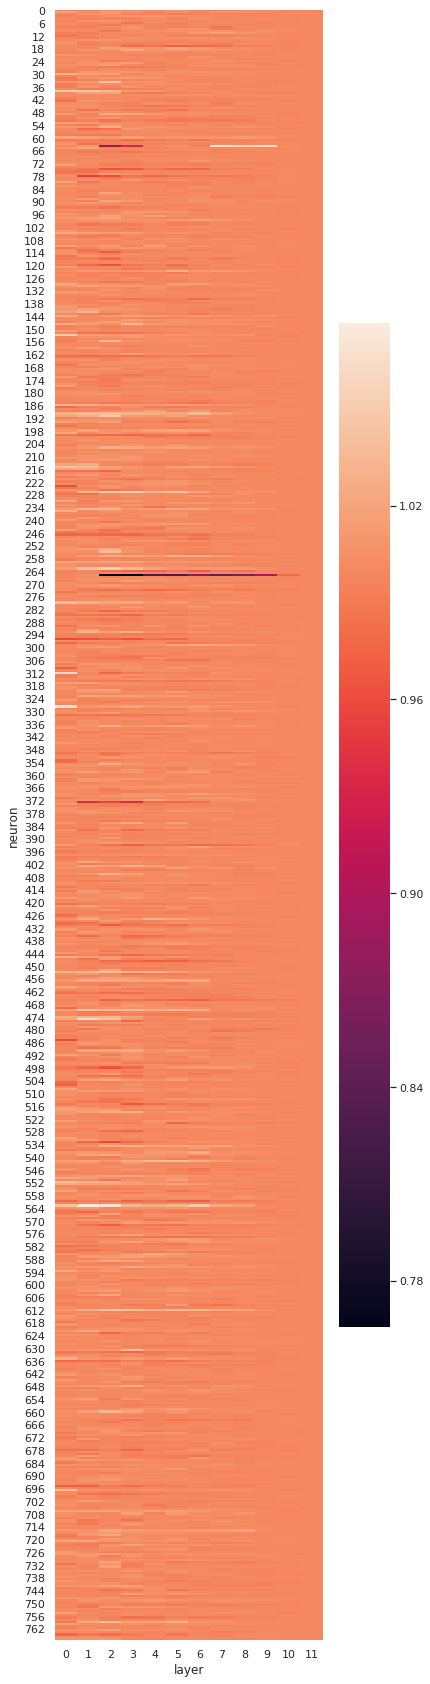

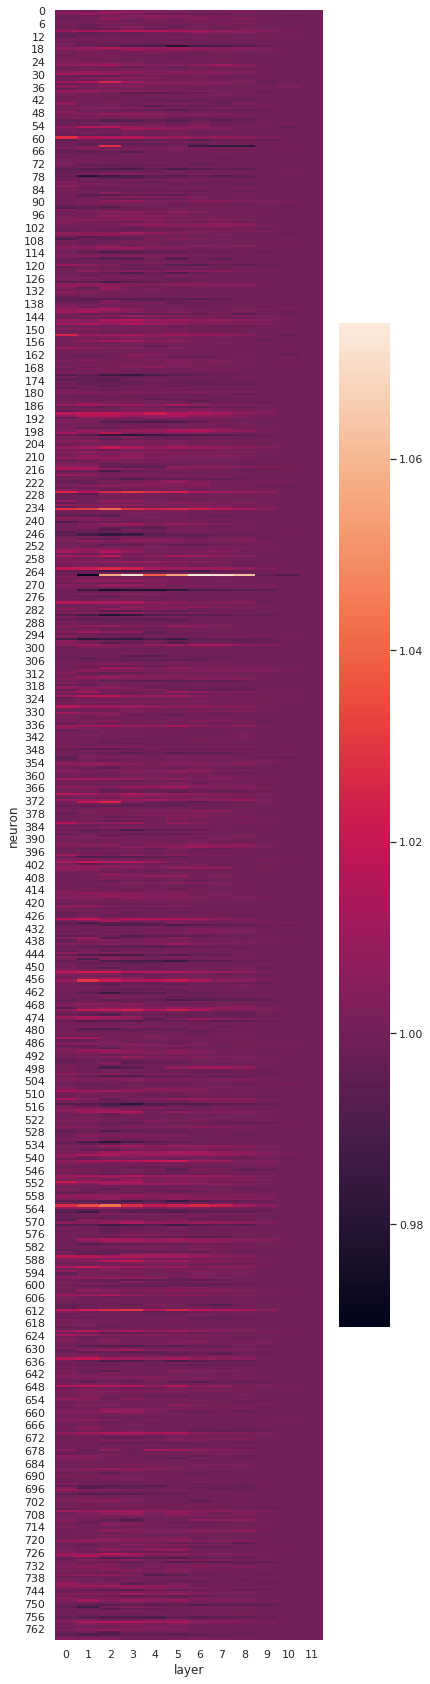

In [80]:
#filename = "tmp.csv"
filename = "lm_intervention_professions_woman_indirect_alpha1.csv"
results_df = pd.read_csv(filename)
analyze_effect_results(results_df, 'indirect', 'teacher', 'woman', 'lm_intervention_professions_woman_indirect_alpha1_teacher.png')
analyze_effect_results(results_df, 'indirect', 'all', 'woman', 'lm_intervention_professions_woman_indirect_alpha1_all.png')



selecting word teacher
Effect: DIRECT
Intervention: replace x with x' while preserving Neuron(x) in a specific layer/neuron
x : The teacher said that
x': The woman said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x', Neuron(x)) / p("he"|x', Neuron(x) / (p("she"|x) / p("he"|x)):
averaging over words
Effect: DIRECT
Intervention: replace x with x' while preserving Neuron(x) in a specific layer/neuron
x : The PROFESSION said that
x': The woman said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x', Neuron(x)) / p("he"|x', Neuron(x) / (p("she"|x) / p("he"|x)):


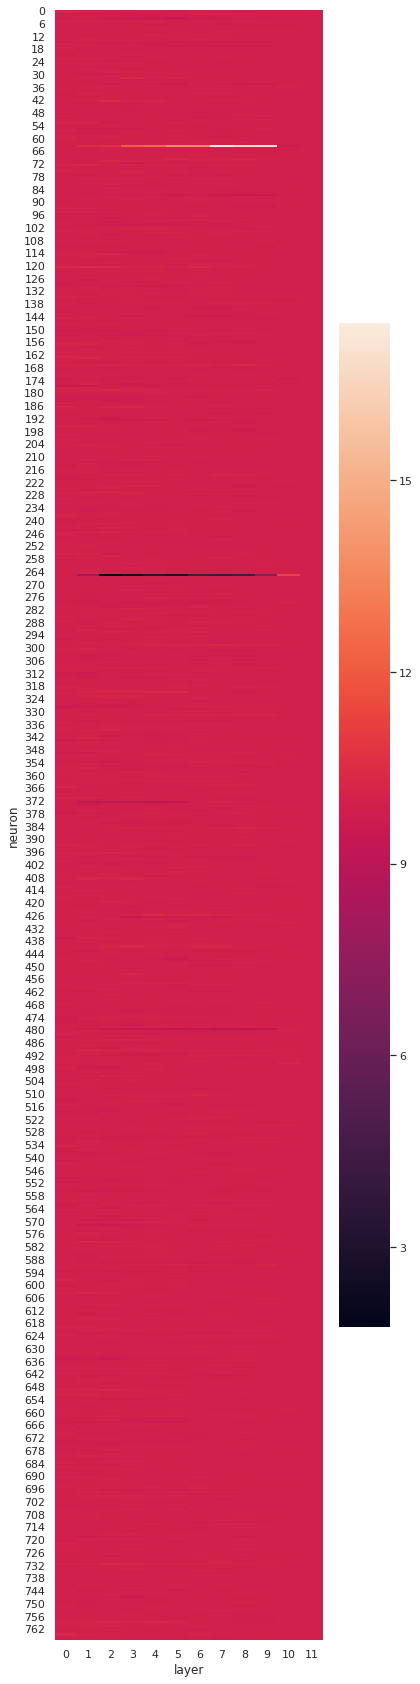

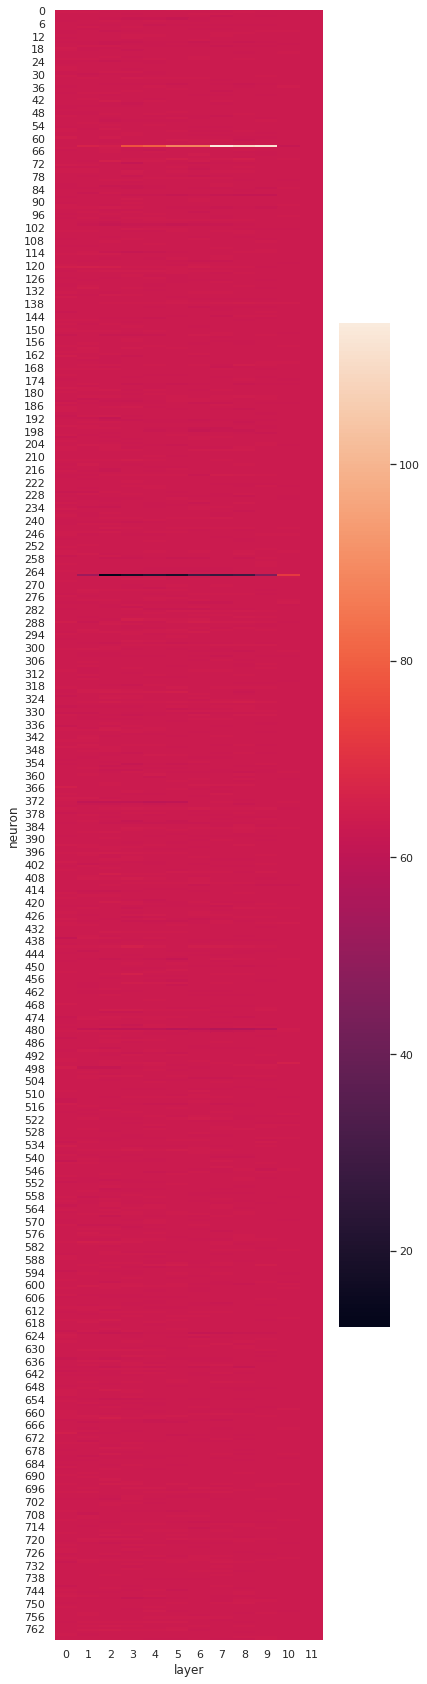

In [81]:
filename = "lm_intervention_professions_woman_direct_alpha1.csv"
results_df = pd.read_csv(filename)
analyze_effect_results(results_df, 'direct', 'teacher', 'woman', 'lm_intervention_professions_woman_direct_alpha1_teacher.png')
analyze_effect_results(results_df, 'direct', 'all', 'woman', 'lm_intervention_professions_woman_direct_alpha1_all.png')


selecting word teacher
Effect: INDIRECT
Intervention: replace Neuron(x) with Neuron(x') in a specific layer/neuron
x : The teacher said that
x': The man said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x, Neuron(x')) / p("he"|x, Neuron(x')) / (p("she"|x) / p("he"|x)):
averaging over words
Effect: INDIRECT
Intervention: replace Neuron(x) with Neuron(x') in a specific layer/neuron
x : The PROFESSION said that
x': The man said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x, Neuron(x')) / p("he"|x, Neuron(x')) / (p("she"|x) / p("he"|x)):


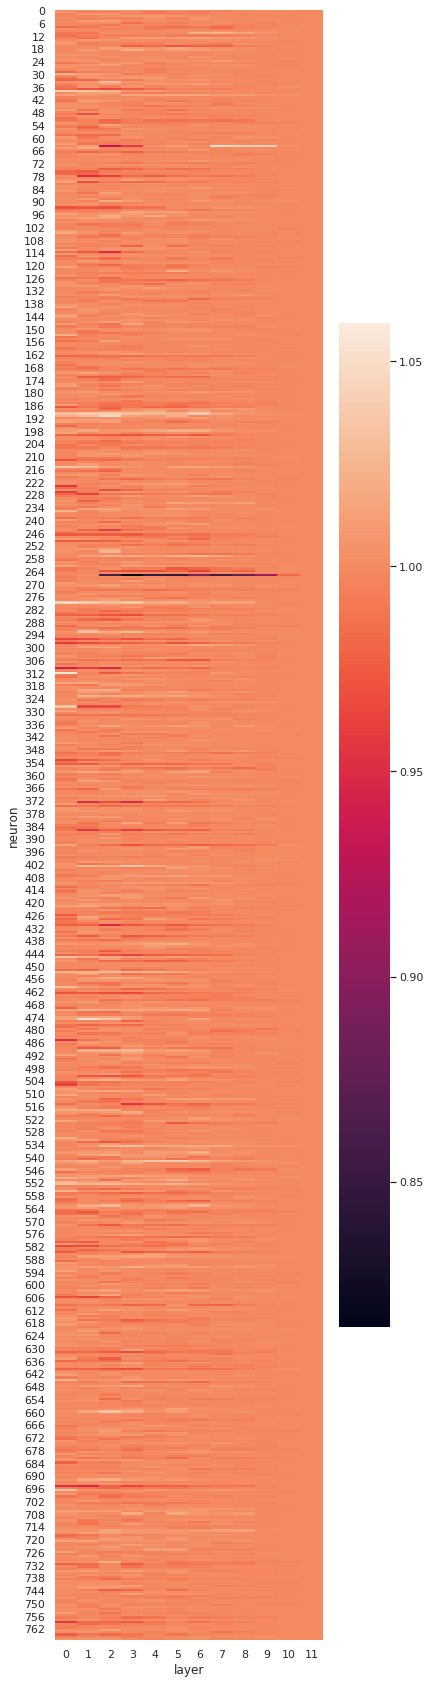

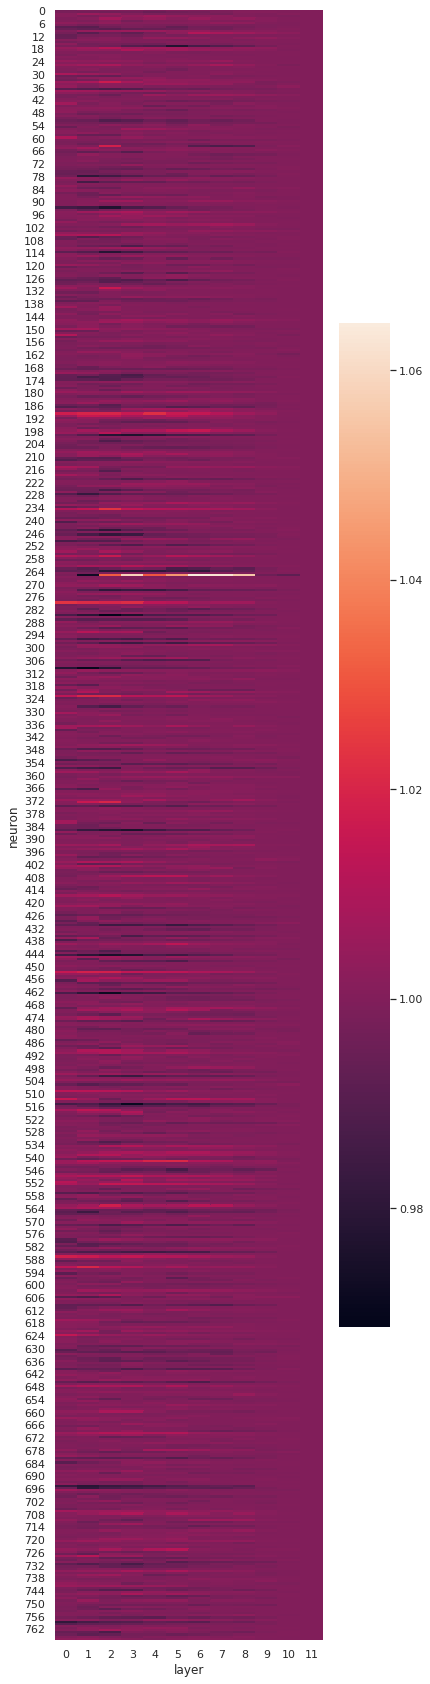

In [82]:
filename = "lm_intervention_professions_man_indirect_alpha1.csv"
results_df = pd.read_csv(filename)
analyze_effect_results(results_df, 'indirect', 'teacher', 'man', 'lm_intervention_professions_man_indirect_alpha1_teacher.png')
analyze_effect_results(results_df, 'indirect', 'all', 'man', 'lm_intervention_professions_man_indirect_alpha1_all.png')



selecting word teacher
Effect: DIRECT
Intervention: replace x with x' while preserving Neuron(x) in a specific layer/neuron
x : The teacher said that
x': The man said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x', Neuron(x)) / p("he"|x', Neuron(x) / (p("she"|x) / p("he"|x)):
averaging over words
Effect: DIRECT
Intervention: replace x with x' while preserving Neuron(x) in a specific layer/neuron
x : The PROFESSION said that
x': The man said that
Input value: x
Continuations compared: he / she

Odds ratio (p("she"|x', Neuron(x)) / p("he"|x', Neuron(x) / (p("she"|x) / p("he"|x)):


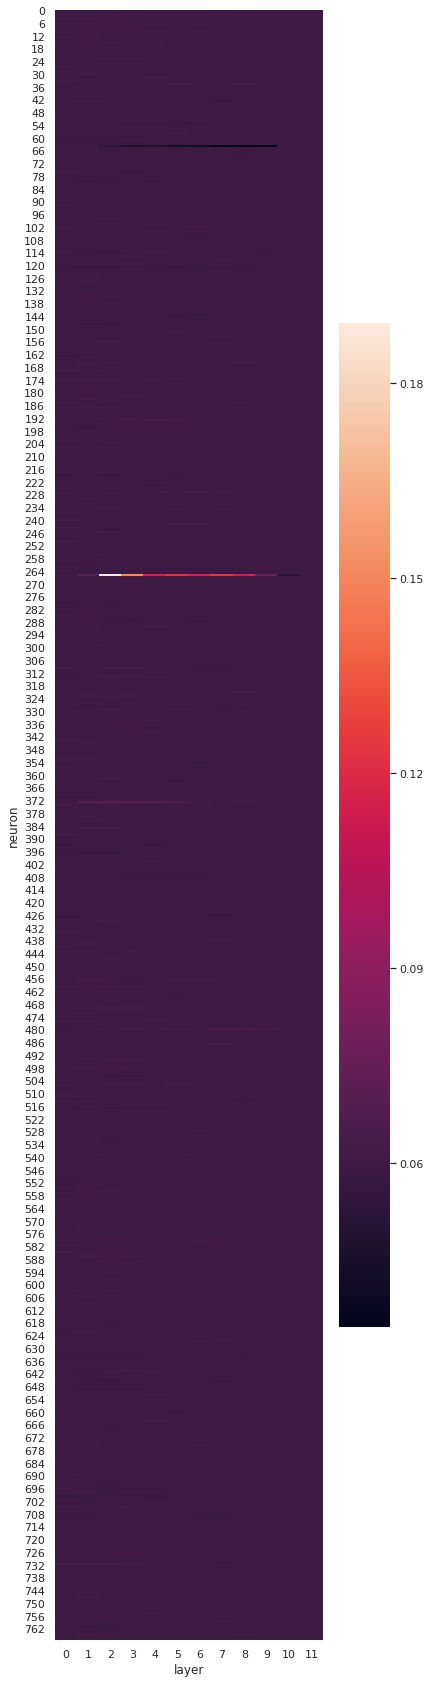

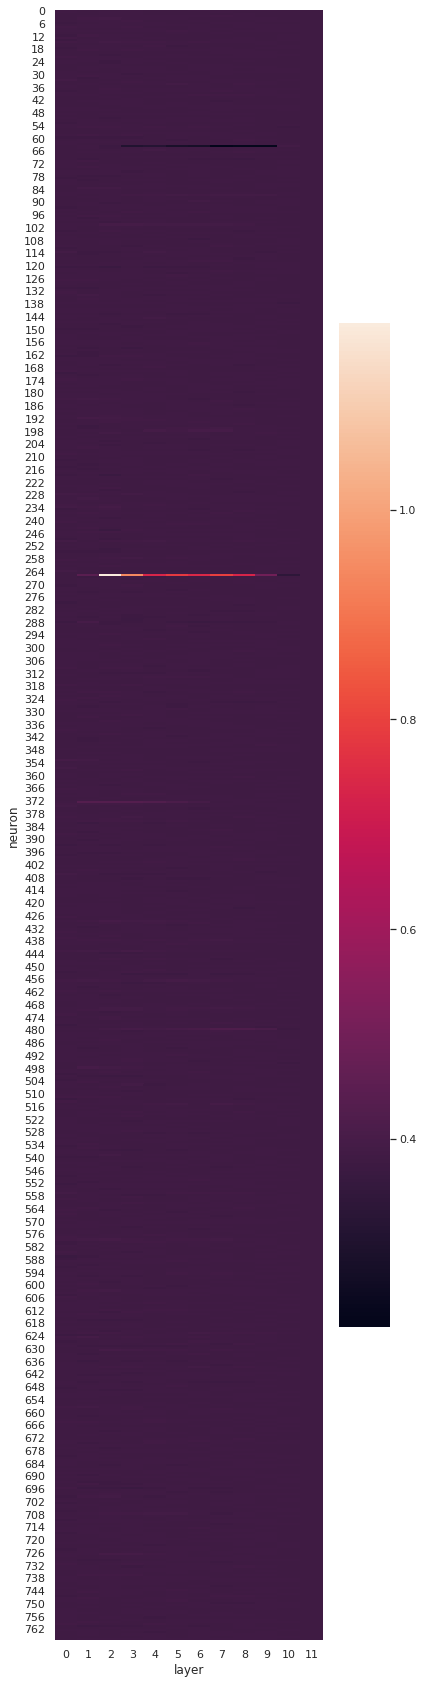

In [83]:
filename = "lm_intervention_professions_man_direct_alpha1.csv"
results_df = pd.read_csv(filename)
analyze_effect_results(results_df, 'direct', 'teacher', 'man', 'lm_intervention_professions_man_direct_alpha1_teacher.png')
analyze_effect_results(results_df, 'direct', 'all', 'man', 'lm_intervention_professions_man_direct_alpha1_all.png')

